Looking at the poly-A tails of human RNA

[FASTA file used](http://hgdownload.cse.ucsc.edu/goldenPath/hg38/bigZips/mrna.fa.gz)

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pysam import FastaFile as fasta

# Returns a DataFrame with length and adenylation of RNA as columns
# Each row is an RNA sample in the FASTA file
def fasta_adenylation(path):
    ff = fasta(path)
    data = {}
    for ref in ff.references:
        rna = ff.fetch(ref)
        index = -1
        while(rna[index] == 'a'):
            index = index -1
        adenylation = index * -1 - 1
        data[ref] = {"length": len(rna), "adenylation": adenylation}
    return pd.DataFrame.from_dict(data, orient="index")


In [39]:
df = fasta_adenylation("data/mrna.fa")
df.head(10)

,length,adenylation
A00118,135,2
A00119,135,0
A00127,2368,1
A00129,252,9
A00149,567,0
A00209,641,0
A00469,814,16
A00501,556,0
A01046,1367,0
A02076,977,0


In [40]:
df.describe()

,length,adenylation
count,2.683747e+06,2.683747e+06
mean,2.054898e+02,1.215645e+00
std,6.991804e+02,5.291671e+00
min,2.000000e+00,0.000000e+00
25%,1.900000e+01,0.000000e+00
50%,1.900000e+01,0.000000e+00
75%,3.200000e+01,1.000000e+00
max,2.050120e+05,2.160000e+02


<IPython.core.display.Javascript object>


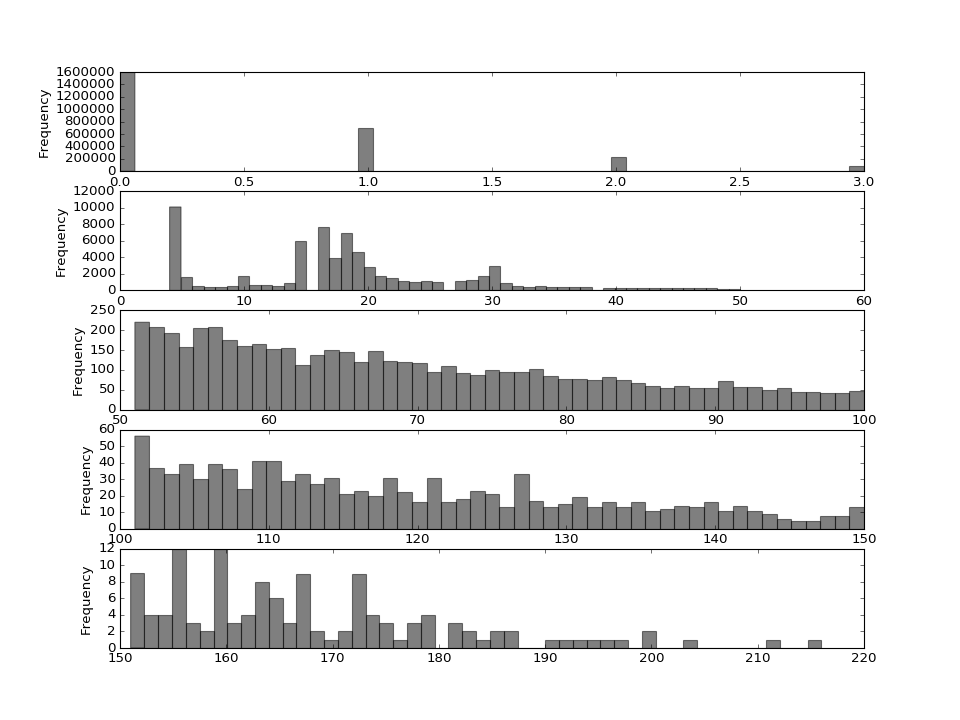

In [45]:
%matplotlib notebook

masks = [(df.adenylation <= 3),
         (df.adenylation > 3) & (df.adenylation <= 50),
         (df.adenylation > 50) & (df.adenylation <= 100),
         (df.adenylation > 100) & (df.adenylation <= 150),
         (df.adenylation > 150)]

plt.figure(figsize=(12,9))
for idx, mask in enumerate(masks):
    plt.subplot(len(masks), 1, idx+1)
    df[mask]["adenylation"].plot.hist(bins=50, alpha=0.5, color='k')
plt.show()

Most of the RNA didn't have poly-A tails

In [42]:
df[(df.adenylation == 0)].describe()

,length,adenylation
count,1.592318e+06,1592318.0
mean,1.944552e+02,0.0
std,6.548029e+02,0.0
min,2.000000e+00,0.0
25%,1.900000e+01,0.0
50%,1.900000e+01,0.0
75%,3.200000e+01,0.0
max,7.447400e+04,0.0


<IPython.core.display.Javascript object>


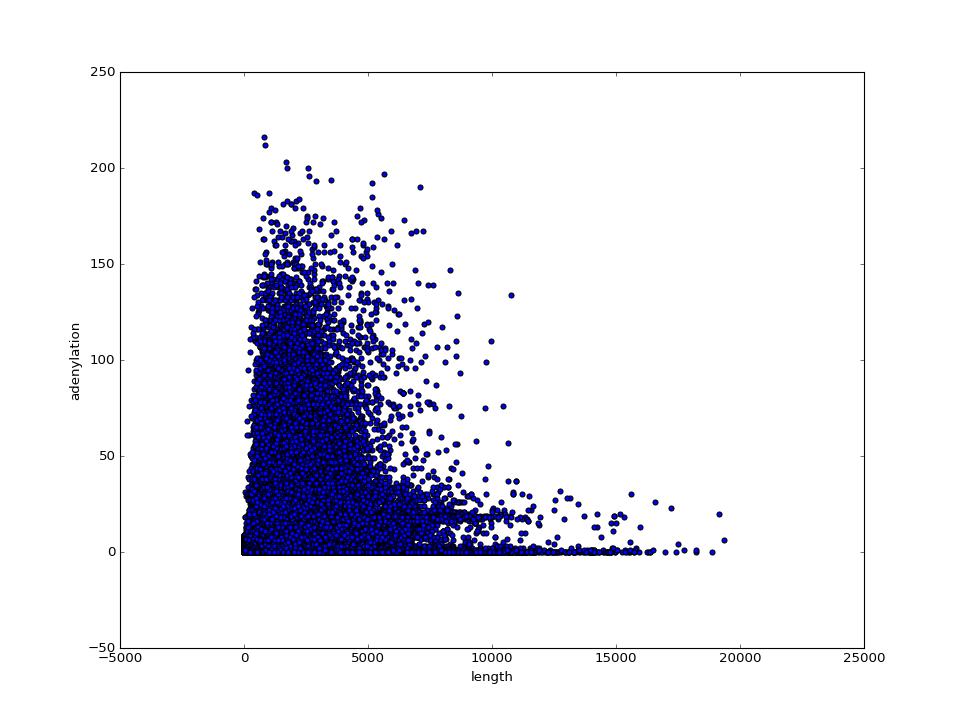

In [43]:
%matplotlib notebook
# Remove a few outliers and put them into a table instead
df[(df.length < 20000)].plot.scatter(x='length', y='adenylation', figsize=(12,9))
plt.show()

In [44]:
# The outliers
df[(df.length >= 20000)]

,length,adenylation
AB537889,21055,7
AF357236,20478,1
AF361486,21112,37
AF414442,66765,15
AF435011,21794,18
AF495910,27652,0
AF495911,21779,18
AF535142,27435,0
AJ002535,20435,0
CS329402,49020,0
